# Example of fMRI preprocessing

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Exploring structural and fMRI BIDS data 

### Let's first look at the file hierarchy

In [ ]:
!ls

In [ ]:
!tree -L 3 ds000105

### Now let's use the power of BIDS

As mentioned in the BIDS lecture, the python package `pybids` offers convenient functions to parse a BIDS dataset. At the heart of this package is a `BIDSLayout` object which offers a representation of the the whole dataset, and can be queried in many different ways. 

In [3]:
from bids import BIDSLayout
import os

data_dir = 'ds000105_full'
bids_layout = BIDSLayout(data_dir)
bids_layout

/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


BIDS Layout: ...inhacker/preproc/ds000105_full | Subjects: 6 | Sessions: 0 | Runs: 71

The simplest (and least specific output) is to get everything with the `.get()` method without arguments.

In [4]:
bids_layout.get_subjects()

['1', '2', '3', '4', '5', '6']

In [5]:
bids_layout.get_tasks()

['objectviewing']

In [8]:
bids_layout.get_runs(subject="5")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

#### Event file

In [9]:
event_file = bids_layout.get(subject="1", task="objectviewing", suffix="events", run="1")[0]
event_file

<BIDSDataFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-01_events.tsv'>

In [10]:
events_df = event_file.get_df()
events_df

,onset,duration,trial_type
0,12.0,0.5,scissors
1,14.0,0.5,scissors
2,16.0,0.5,scissors
3,18.0,0.5,scissors
4,20.0,0.5,scissors
...,...,...,...
91,278.0,0.5,chair
92,280.0,0.5,chair
93,282.0,0.5,chair
94,284.0,0.5,chair


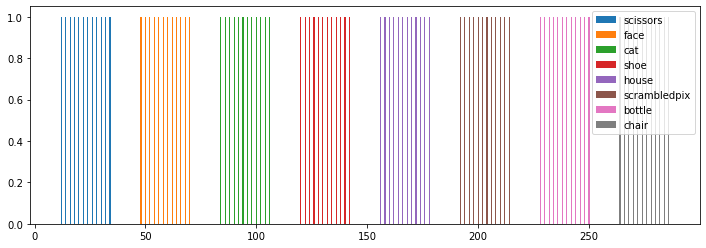

In [60]:
plt.figure(figsize=(12,4))
plotted_types = []
for trial_type in events_df["trial_type"].unique():
    plt.bar(events_df.loc[events_df["trial_type"]==trial_type, "onset"], 
            1,
            events_df.loc[events_df["trial_type"]==trial_type, "duration"],
            label=trial_type)
plt.legend();

#### Image files

In [11]:
image_files = bids_layout.get(subject="1", extension='nii.gz')
image_files

[<BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/anat/sub-1_T1w.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-01_bold.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-02_bold.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-03_bold.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-04_bold.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-05_bold.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-06_bold.nii.gz'>,
 <BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-07_bold.nii.gz'>,
 <BIDSImageFile filename='/home/bra

In [12]:
# Note: since a list is always returned, we use [0] to get the first (and only) element
t1_file = bids_layout.get(subject="1", extension='nii.gz', suffix="T1w")[0]
t1_file

<BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/anat/sub-1_T1w.nii.gz'>

In [52]:
t1_file

<BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/anat/sub-1_T1w.nii.gz'>

##### Plotting structural data

In [13]:
import nibabel as nib

In [15]:
t1 = nib.load(t1_file)
t1_data = t1.get_fdata()

In [60]:
# size of each voxel along each dimension in mm
t1.header.get_zooms()

(1.2, 0.9375, 0.9375)

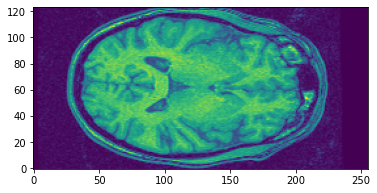

In [17]:
plt.imshow(t1_data[:, :, 130], origin="lower");

**Exercise**
1. Plot a coronal and sagittal slice of the structural data
2. Assign to the variable `func_run1_file` the first run of the task data
  Hint 1: Replace the parameter `suffix` used in the call to get `t1_file` by the parameters `task` and `run` with the proper arguments
  Hint 2: Use `task="objectviewing"` and `run="1"`
3. Using `nibabel`, assign to the variable `func_run1_data` the numpy data in `func_run1_file`
4. Keeping in mind that fmri file are 4D arrays:
    1. Find out how many time points there are in `func_run1`
    2. Display the 30th axial slice of the volume corresponding to the 10th timepoint (i.e. the 10th acquisition)
    3. Display the whole time course of a voxel of your choice

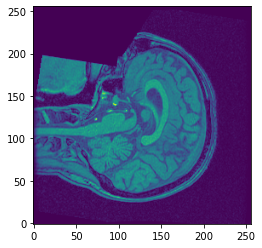

In [30]:
plt.imshow(t1_data[62, :, :], origin="lower");

In [23]:
t1_data.shape

(124, 256, 256)

In [31]:
func_run1_file = bids_layout.get(subject="1", extension='nii.gz', task="objectviewing", run="1")[0]

In [32]:
func_run1_file

<BIDSImageFile filename='/home/brainhacker/preproc/ds000105_full/sub-1/func/sub-1_task-objectviewing_run-01_bold.nii.gz'>

In [33]:
func_run1 = nib.load(func_run1_file)
func_run1_data = func_run1.get_fdata()

In [34]:
func_run1_data.shape

(40, 64, 64, 121)

In [35]:
func_run1_data_timepoint10 = func_run1_data[:, :, 32 ,9]

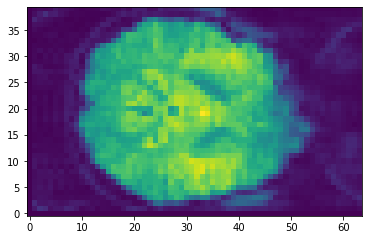

In [36]:
plt.imshow(func_run1_data_timepoint10, origin="lower");

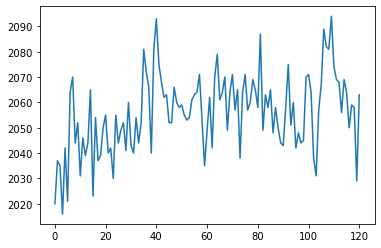

In [37]:
plt.plot(func_run1_data[17, 30, 32 , :])

## Creating a pipeline with NiPype

![title](nodes.png)

In [38]:
# Import the Node module
from nipype import Node

In [42]:
!ls

backup	  ds000105_full   fs.txt     preproc.ipynb
ds000105  freesurfer.txt  nodes.png


In [40]:
input_data_dir = 'ds000105/sub-1/anat'
T1_file = os.path.abspath(os.path.join(input_data_dir, 'sub-1_T1w.nii.gz'))
output_data_dir = os.path.abspath('nipype_demo')

In [41]:
T1_file

'/home/brainhacker/preproc/ds000105/sub-1/anat/sub-1_T1w.nii.gz'

### Using an interface to a neuroimaging software 

In [44]:
# Import BET from the FSL interface
from nipype.interfaces.fsl import BET
# Create Node
bet_node = Node(BET(frac=0.3, in_file=T1_file), 
                name='bet_node')

210303-10:42:57,316 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [46]:
bet_out = bet_node.run()

210303-10:44:37,880 nipype.workflow INFO:
	 [Node] Setting-up "bet_node" in "/tmp/tmphxadlcpu/bet_node".
210303-10:44:37,887 nipype.workflow INFO:
	 [Node] Running "bet_node" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /home/brainhacker/preproc/ds000105/sub-1/anat/sub-1_T1w.nii.gz /tmp/tmphxadlcpu/bet_node/sub-1_T1w_brain.nii -f 0.30
210303-10:44:38,699 nipype.workflow WARNING:
	 Storing result file without outputs
210303-10:44:38,701 nipype.workflow WARNING:
	 [Node] Error on "bet_node" (/tmp/tmphxadlcpu/bet_node)


OSError: No command "bet" found on host ip-172-31-24-204. Please check that the corresponding package is installed.

In [139]:
bet_file = bet_out.outputs.out_file
bet_file

'/tmp/tmpiiwmuar7/bet_node/sub-1_T1w_brain.nii.gz'

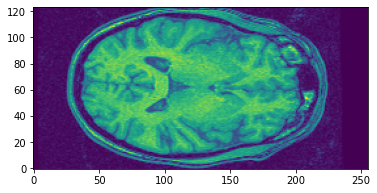

In [137]:
before_bet_file = nib.load(T1_file)
before_bet_data = before_bet_file.get_fdata()
plt.imshow(before_bet_data[:, :, 130], origin="lower");

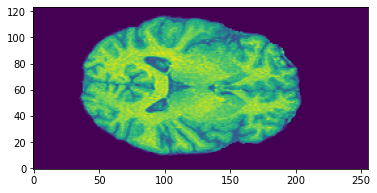

In [140]:
after_bet_file = nib.load(bet_file)
after_bet_data = after_bet_file.get_fdata()
plt.imshow(after_bet_data[:, :, 130], origin="lower");

### Using a custom function

In [47]:
from nipype import Function

In [48]:
# Create a small example function
def get_basename(file_path):
    import os
    return os.path.basename(file_path)

# Create Node
get_basename_node = Node(Function(input_names=["file_path"],
                                  output_names=["basename"],
                                  function=get_basename),
                         name='add_node')

In [49]:
get_basename_node.inputs.file_path = '/test/of/get_basename.txt'
basename_out = get_basename_node.run()

210303-10:48:01,698 nipype.workflow INFO:
	 [Node] Setting-up "add_node" in "/tmp/tmpcxgvnr2s/add_node".
210303-10:48:01,717 nipype.workflow INFO:
	 [Node] Running "add_node" ("nipype.interfaces.utility.wrappers.Function")
210303-10:48:01,734 nipype.workflow INFO:
	 [Node] Finished "add_node".


In [50]:
basename_out.outputs.basename

'get_basename.txt'

### Creating a pipeline (also called workflow)

In [51]:
from nipype import Workflow

In [ ]:
# Define our BET node as if we did not do it before
bet_node = Node(BET(frac=0.3, in_file=T1_file, 
                mask=True), name='bet_node')
# Define our basename node
get_basename_node = Node(Function(input_names=["file_path"],
                                  output_names=["basename"],
                                  function=get_basename),
                         name='get_basename_node')
# Define a workflow and connect the two nodes together
bet_wf = Workflow(name="bet_wf", base_dir=output_data_dir)
bet_wf.connect([(bet_node, get_basename_node, 
             [("mask_file", "file_path")])])
# Run the workflow
bet_wf.run()

In [ ]:
bet_wf.base_dir

In [ ]:
!cat nipype_demo/bet_wf/get_basename_node/_report/report.rst

### Visualizing a pipeline graph

In [ ]:
bet_wf.write_graph("workflow_graph.dot", graph2use='flat')

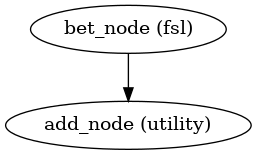

In [188]:
from IPython.display import Image
Image(filename=os.path.join(output_data_dir, "bet_wf", "workflow_graph.png"))

**Exercise**
1. Instead of a node outputting the basename, create a node reading outputting the number of voxel of an image
  - Hint: use the shape attribute of the `nibabel` `numpy` array to compute this number
2. Create a workflow to count the number of voxels in the BET brain mask, so that to estimate the total brain volume
3. Create a graph of the resulting pipeline
4. Use `cat` on the workflow report to check you get a meaningful number

## Preprocessing the data with fmriprep

```bash
fmriprep-docker ds000105 ds000105/derivatives participant --participant_label sub-1 --write-graph --fs-no-reconall --notrack --fs-license-file fs.txt
```

See full documentation [here](https://fmriprep.org/en/stable/)

We will have a look at the output of `fmriprep` at the next lesson